```
Copyright 2021 Twitter, Inc.
SPDX-License-Identifier: Apache-2.0
```

## Image Crop Analysis

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twitter-research/image-crop-analysis/blob/master/notebooks/Image%20Crop%20Analysis.ipynb)

In [1]:
!pip install --upgrade pip
!pip install "tensorflow==2.15.0" "tf-keras==2.15.*"    
!pip install torch torchvision torchaudio
!pip install py-feat
!pip install scikit-image pandas matplotlib statsmodels requests dash notebook jupyterlab
!pip install retina-face
!pip install "pillow==9.5.0"

In [2]:
import logging, shlex, subprocess, sys
from pathlib import Path
from collections import namedtuple

import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle

# — garantir visibilidade da pasta src/ —
import pathlib
SRC = pathlib.Path.cwd().parents[0] / "src"
if str(SRC) not in sys.path:
    sys.path.insert(0, str(SRC)) 

# — modelo RetinaFace —
from crop_api_retina_face import RetinaFaceSaliencyModel as ImageSaliencyModel
model = ImageSaliencyModel()

logging.basicConfig(level=logging.ERROR)


In [3]:
import platform

BIN_MAPS = {"Darwin": "mac", "Linux": "linux"}

HOME_DIR = Path("../").expanduser()

try:
    import google.colab
    ! pip install pandas scikit-learn scikit-image statsmodels requests dash
    ! [[ -d image-crop-analysis ]] || git clone https://github.com/twitter-research/image-crop-analysis.git
    HOME_DIR = Path("./image-crop-analysis").expanduser()
    IN_COLAB = True
except:
    IN_COLAB = False

sys.path.append(str(HOME_DIR / "src"))
bin_dir = HOME_DIR / Path("./bin")
bin_path = bin_dir / BIN_MAPS[platform.system()] / "candidate_crops"
model_path = bin_dir / "fastgaze.vxm"
data_dir = HOME_DIR / Path("./data/")
data_dir.exists()

True

In [4]:
img_path = next(data_dir.glob("./*.jpeg"))
img_path

PosixPath('../data/dummy2.jpeg')

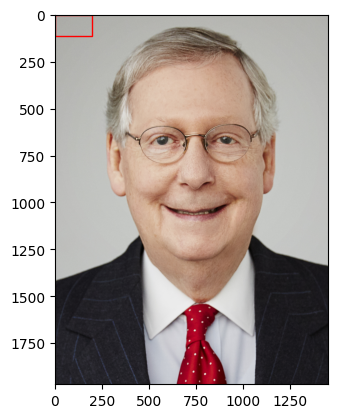

In [5]:
img = mpimg.imread(img_path)
plt.imshow(img)
plt.gca().add_patch(
    Rectangle((0, 0), 200, 112, linewidth=1, edgecolor="r", facecolor="none")
)

In [6]:
str(img_path.absolute())

'/Users/gabrielli/Development/tcc/image-crop-analysis/notebooks_retina_face/../data/dummy2.jpeg'

In [7]:
cmd = f"{str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points"
cmd

"../bin/mac/candidate_crops ../bin/fastgaze.vxm '/Users/gabrielli/Development/tcc/image-crop-analysis/notebooks_retina_face/../data/dummy2.jpeg' show_all_points"

In [8]:
# output = subprocess.check_output(cmd, shell=True)  # Success!
# print(output.splitlines())

In [9]:
# ! {str(bin_path)} {str(model_path)} '{img_path.absolute()}' show_all_points | head

In [10]:
from crop_api_retina_face import RetinaFaceSaliencyModel as ImageSaliencyModel

In [11]:
# parse_output(output).keys()

In [12]:
model = ImageSaliencyModel()

In [13]:
plt.matplotlib.__version__

'3.10.3'

In [14]:
list(data_dir.glob("./*.jpeg"))

[PosixPath('../data/dummy2.jpeg'), PosixPath('../data/dummy.jpeg')]

../data/dummy2.jpeg
None 1457 1969
../data/dummy.jpeg
None 1916 2608


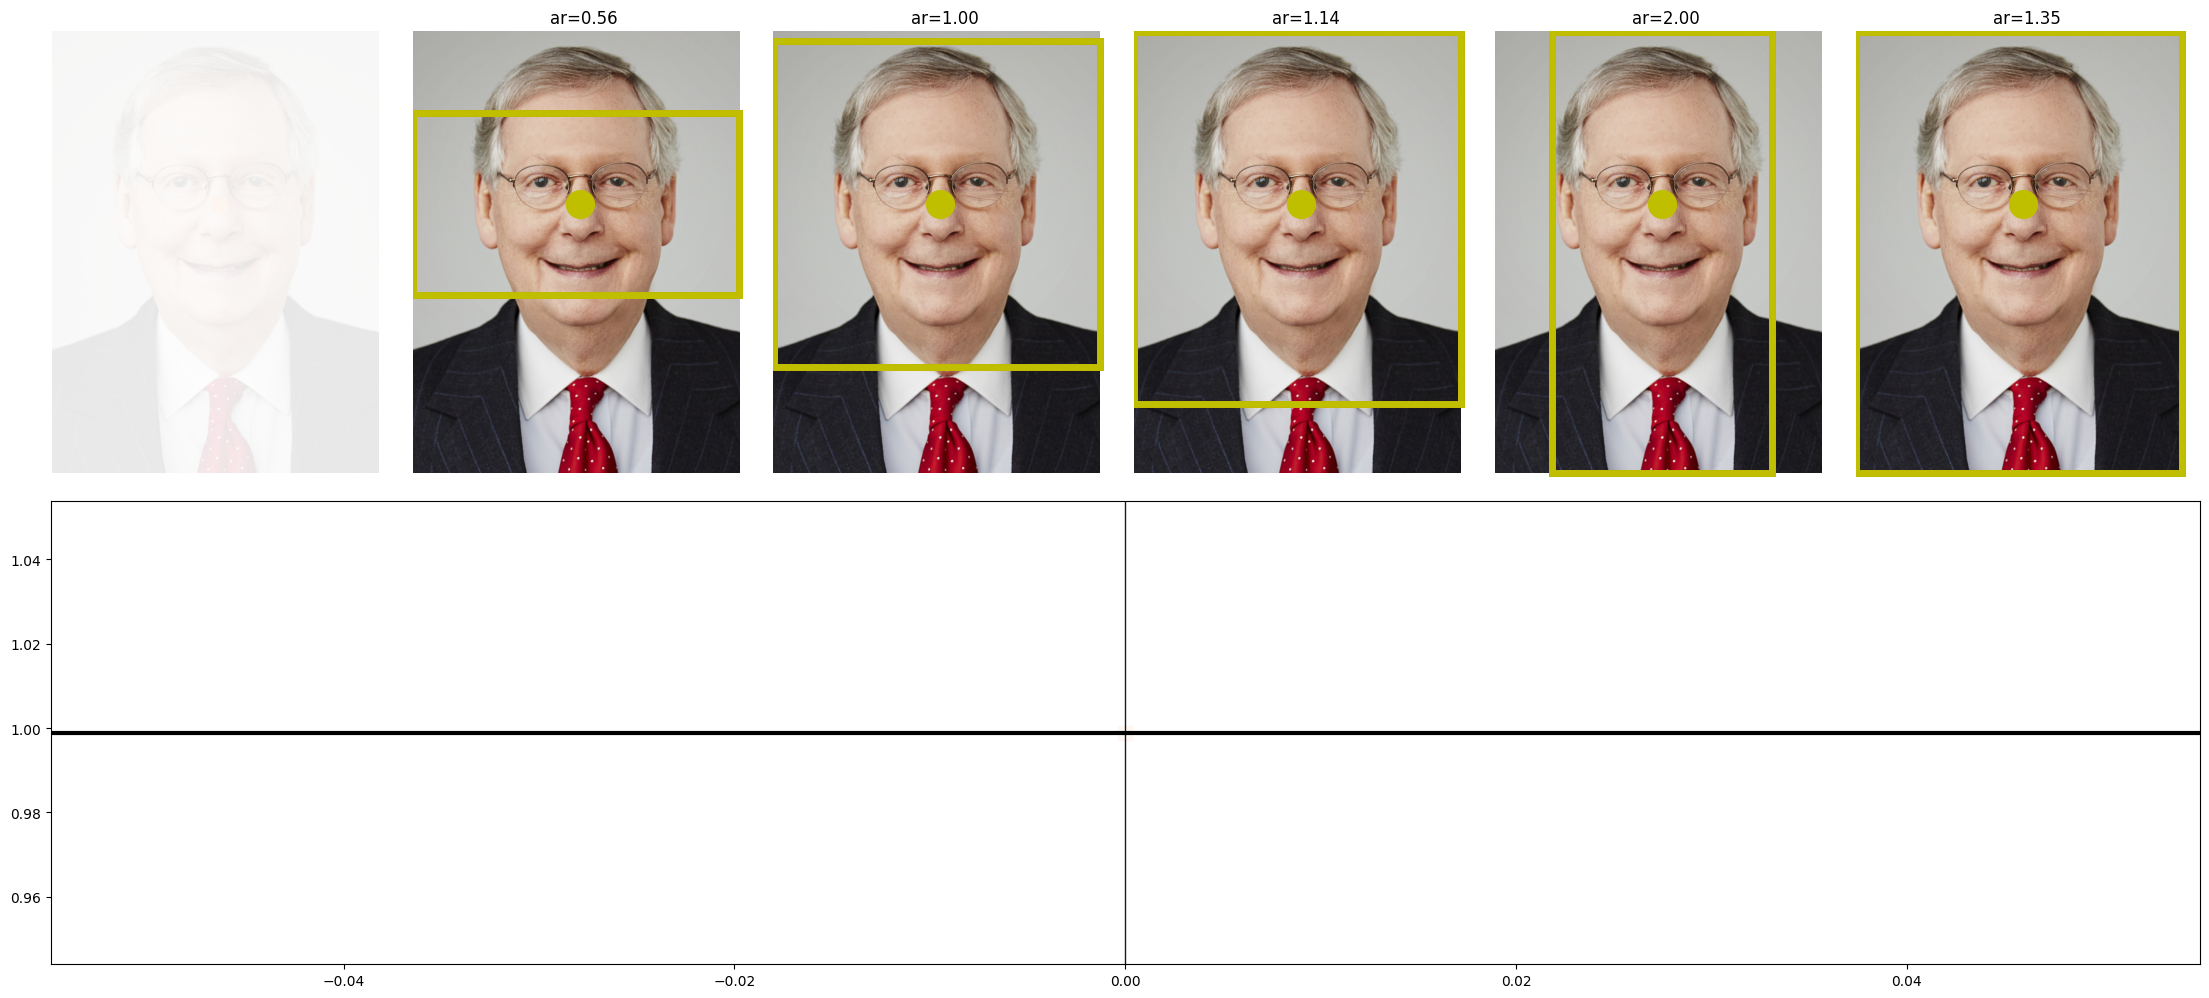

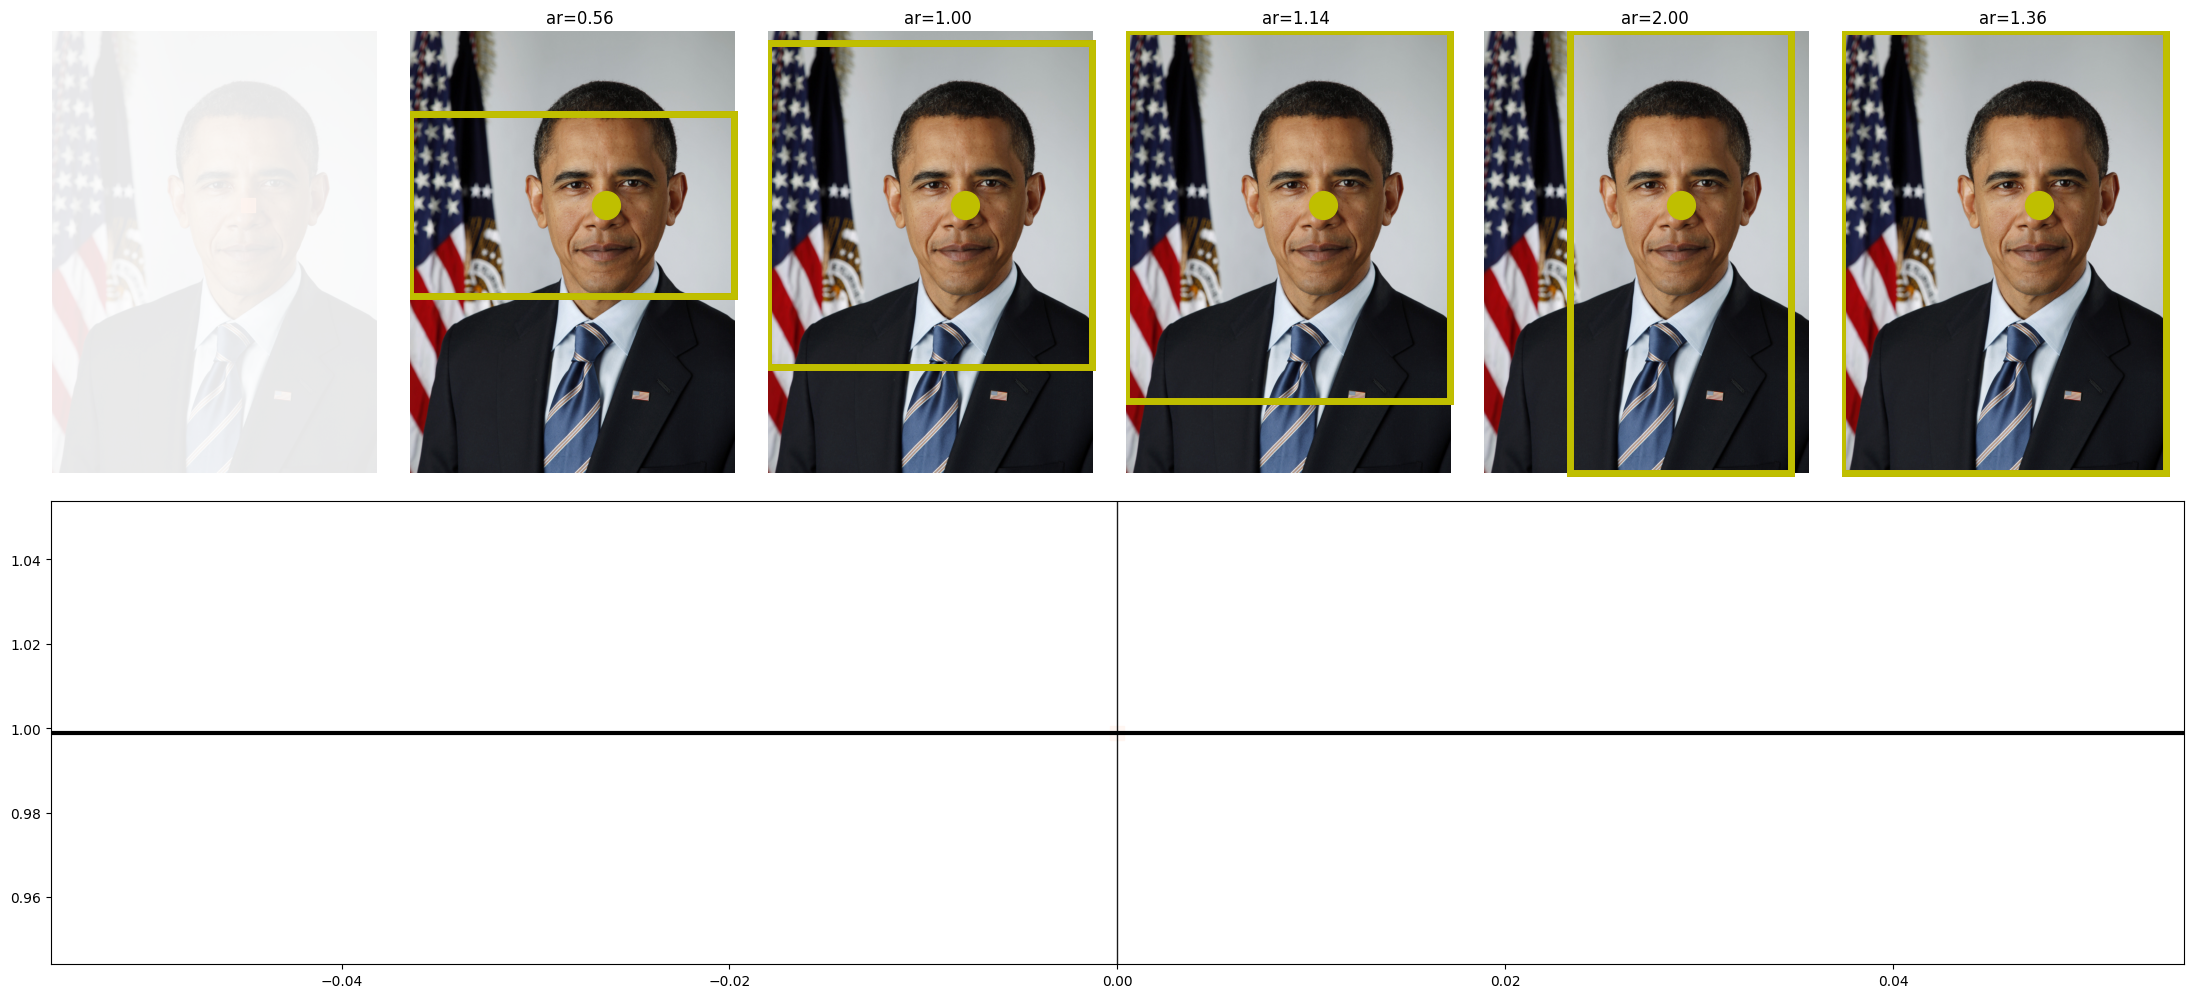

In [15]:
for img_path in data_dir.glob("*.jpeg"):
    print(img_path)
    model.plot_img_crops(img_path)

../data/dummy2.jpeg
None 1457 1969
../data/dummy.jpeg
None 1916 2608


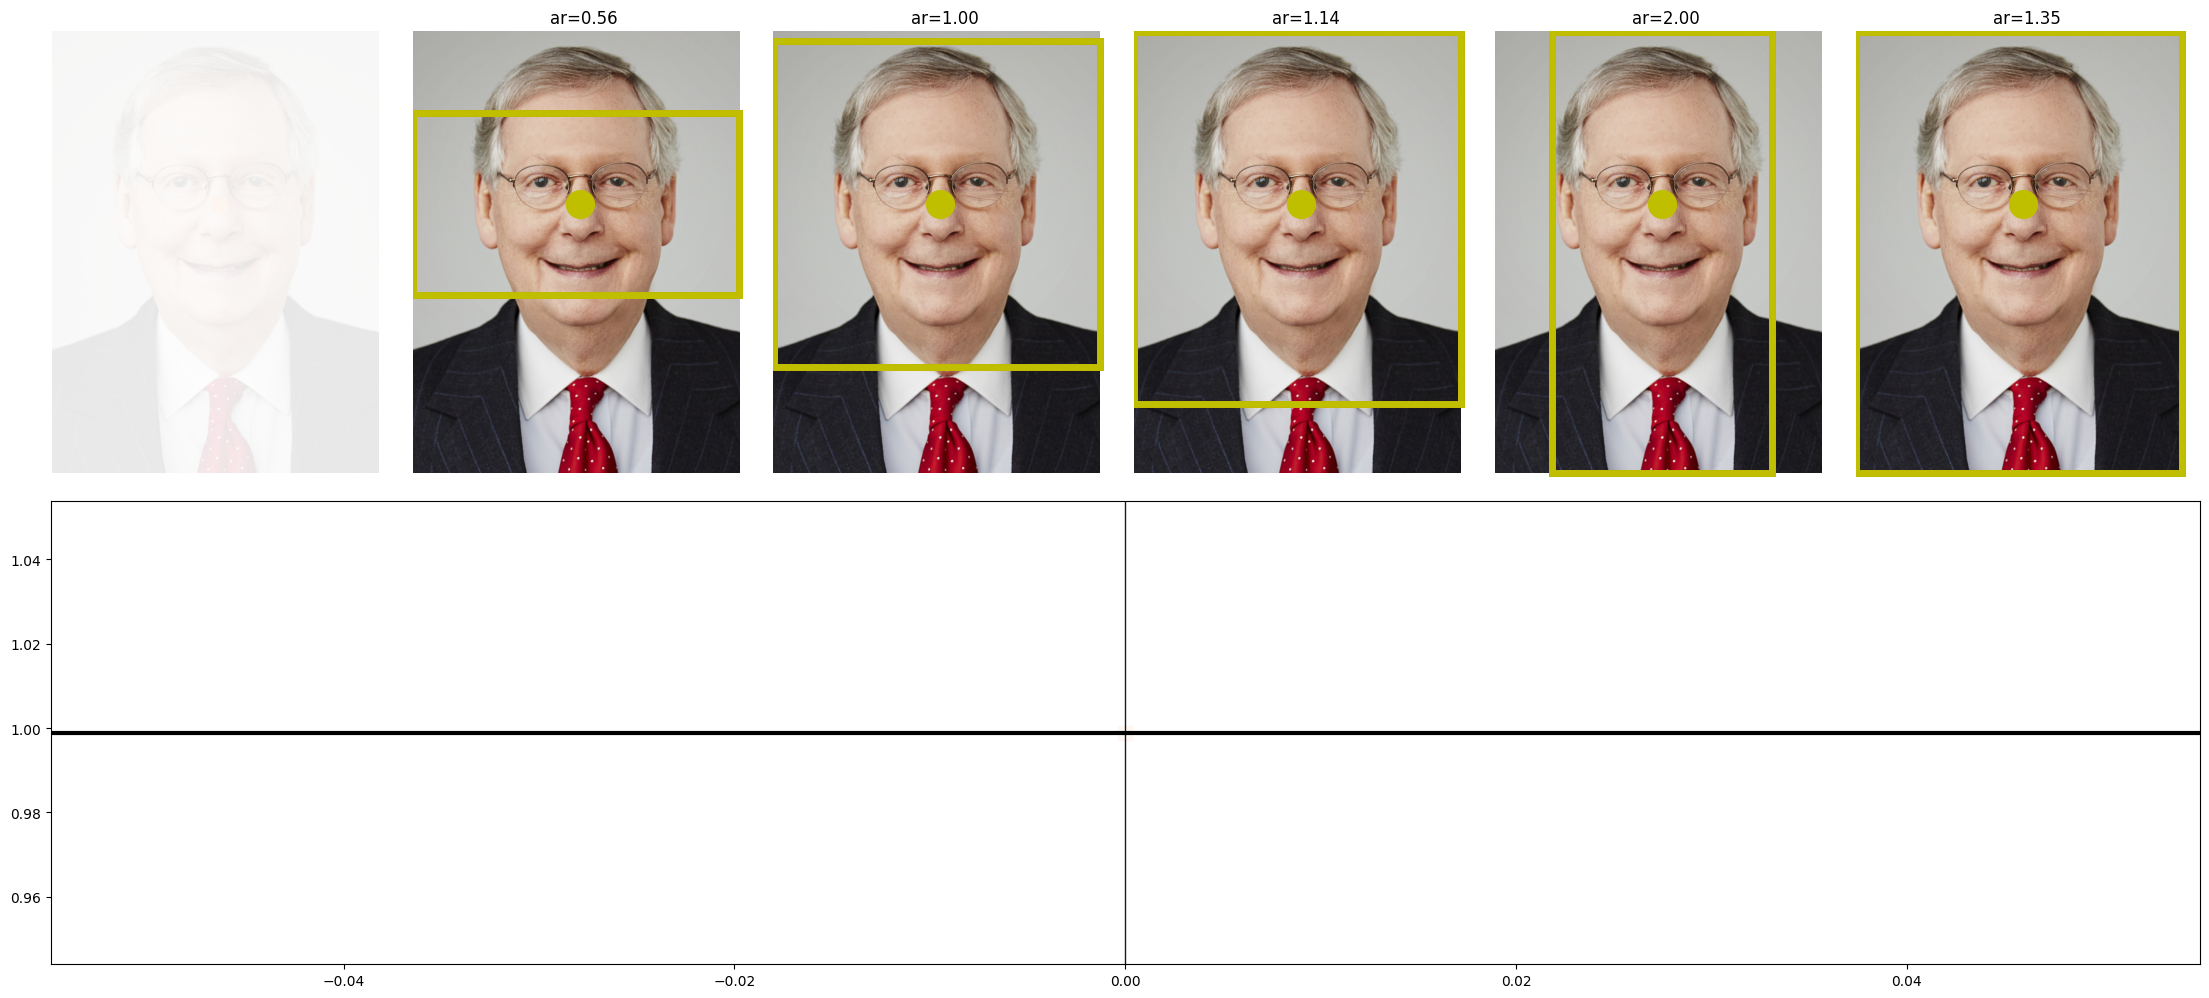

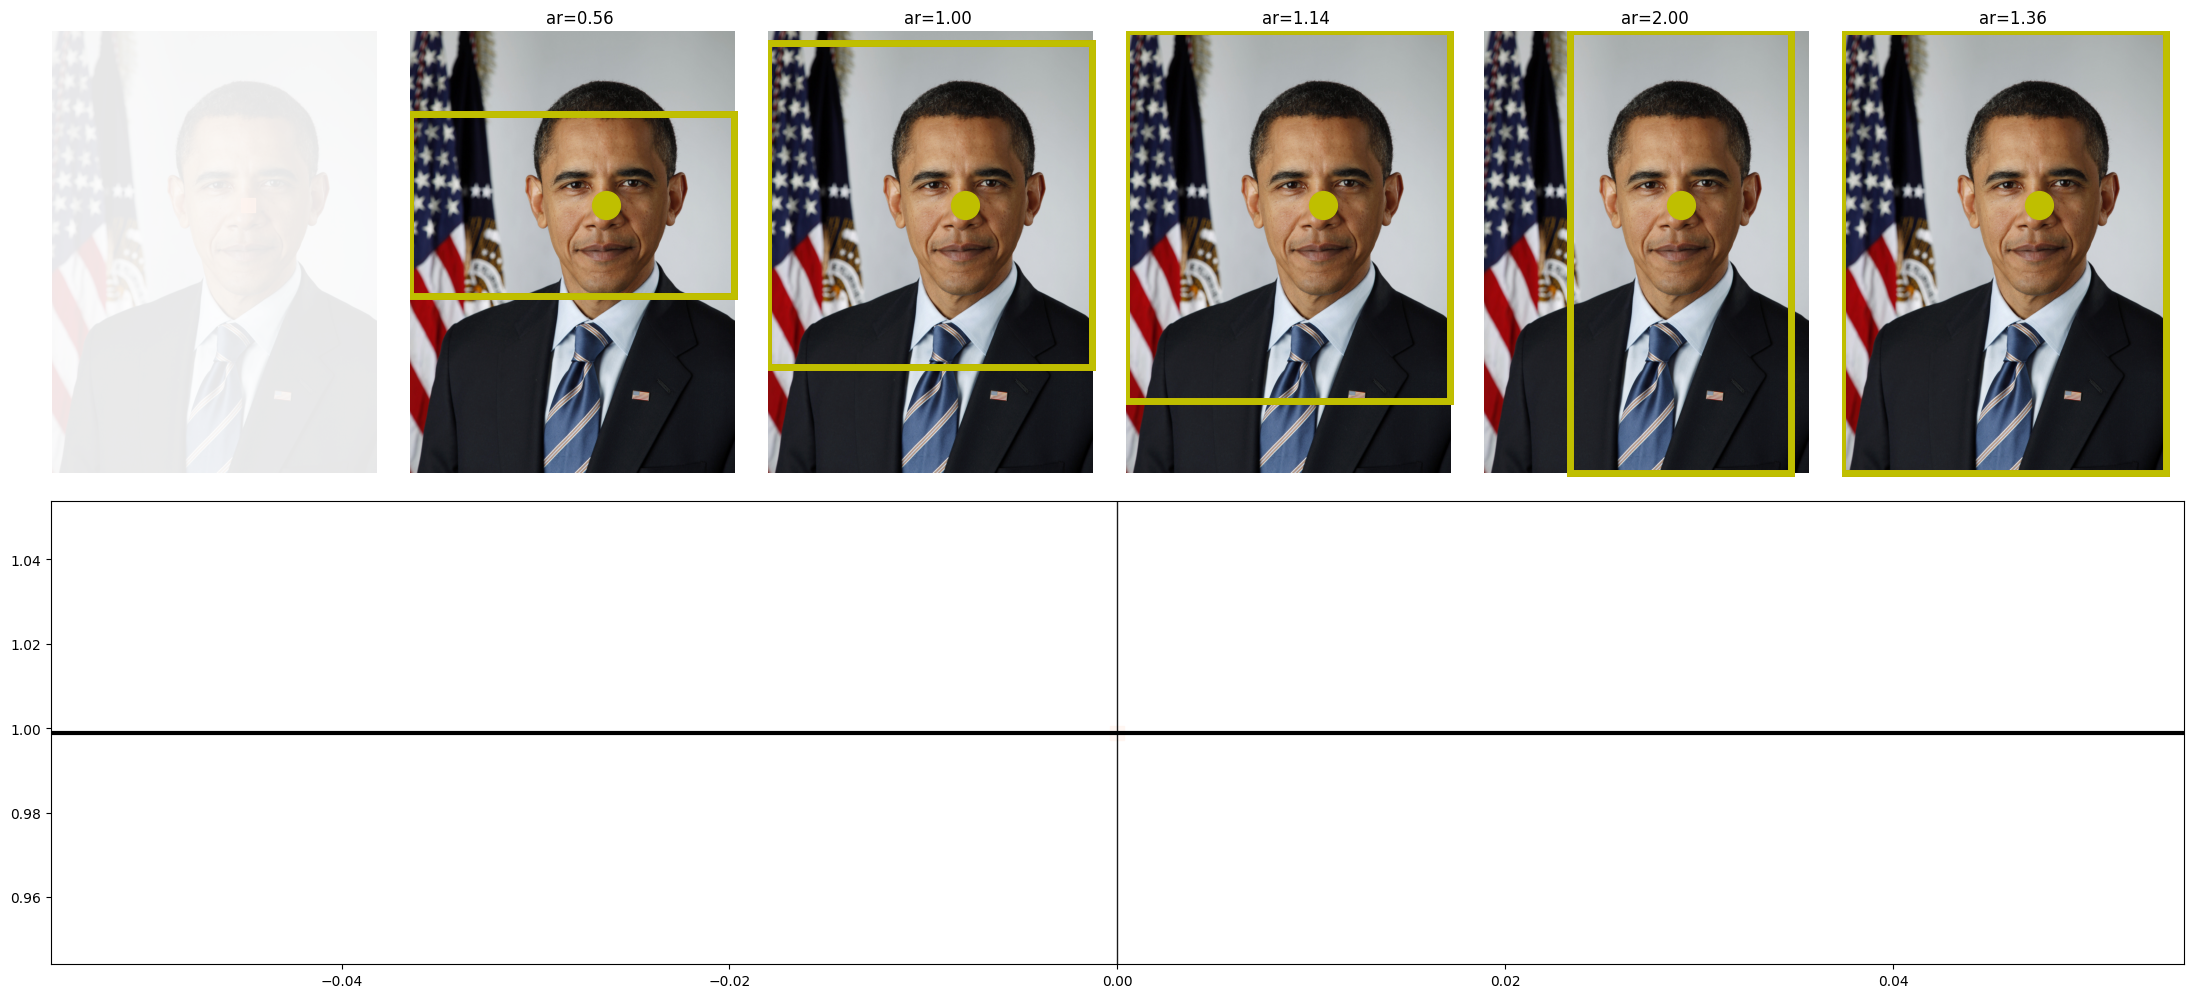

In [16]:
for img_path in data_dir.glob("*.jpeg"):
    print(img_path)
    model.plot_img_crops(img_path)

None 1457 1969
None 1916 2608


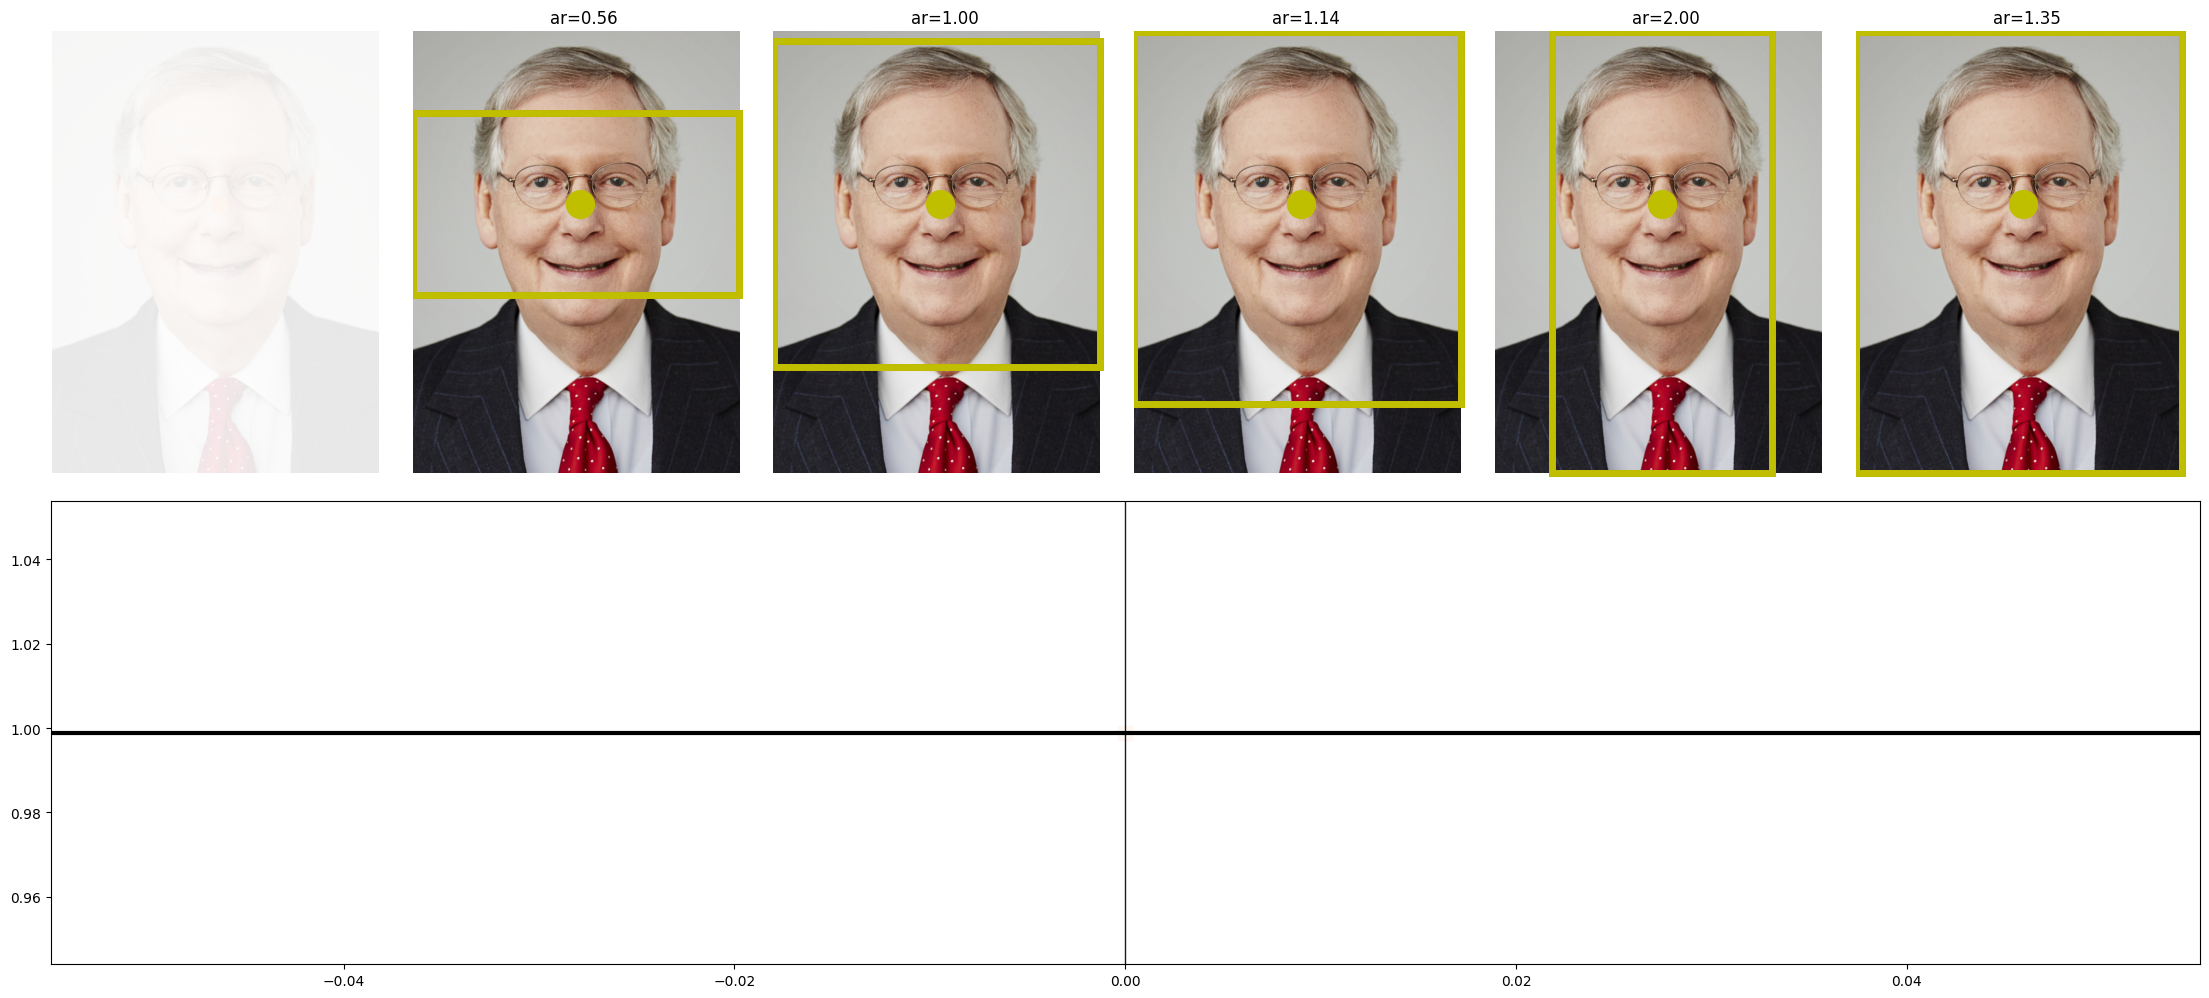

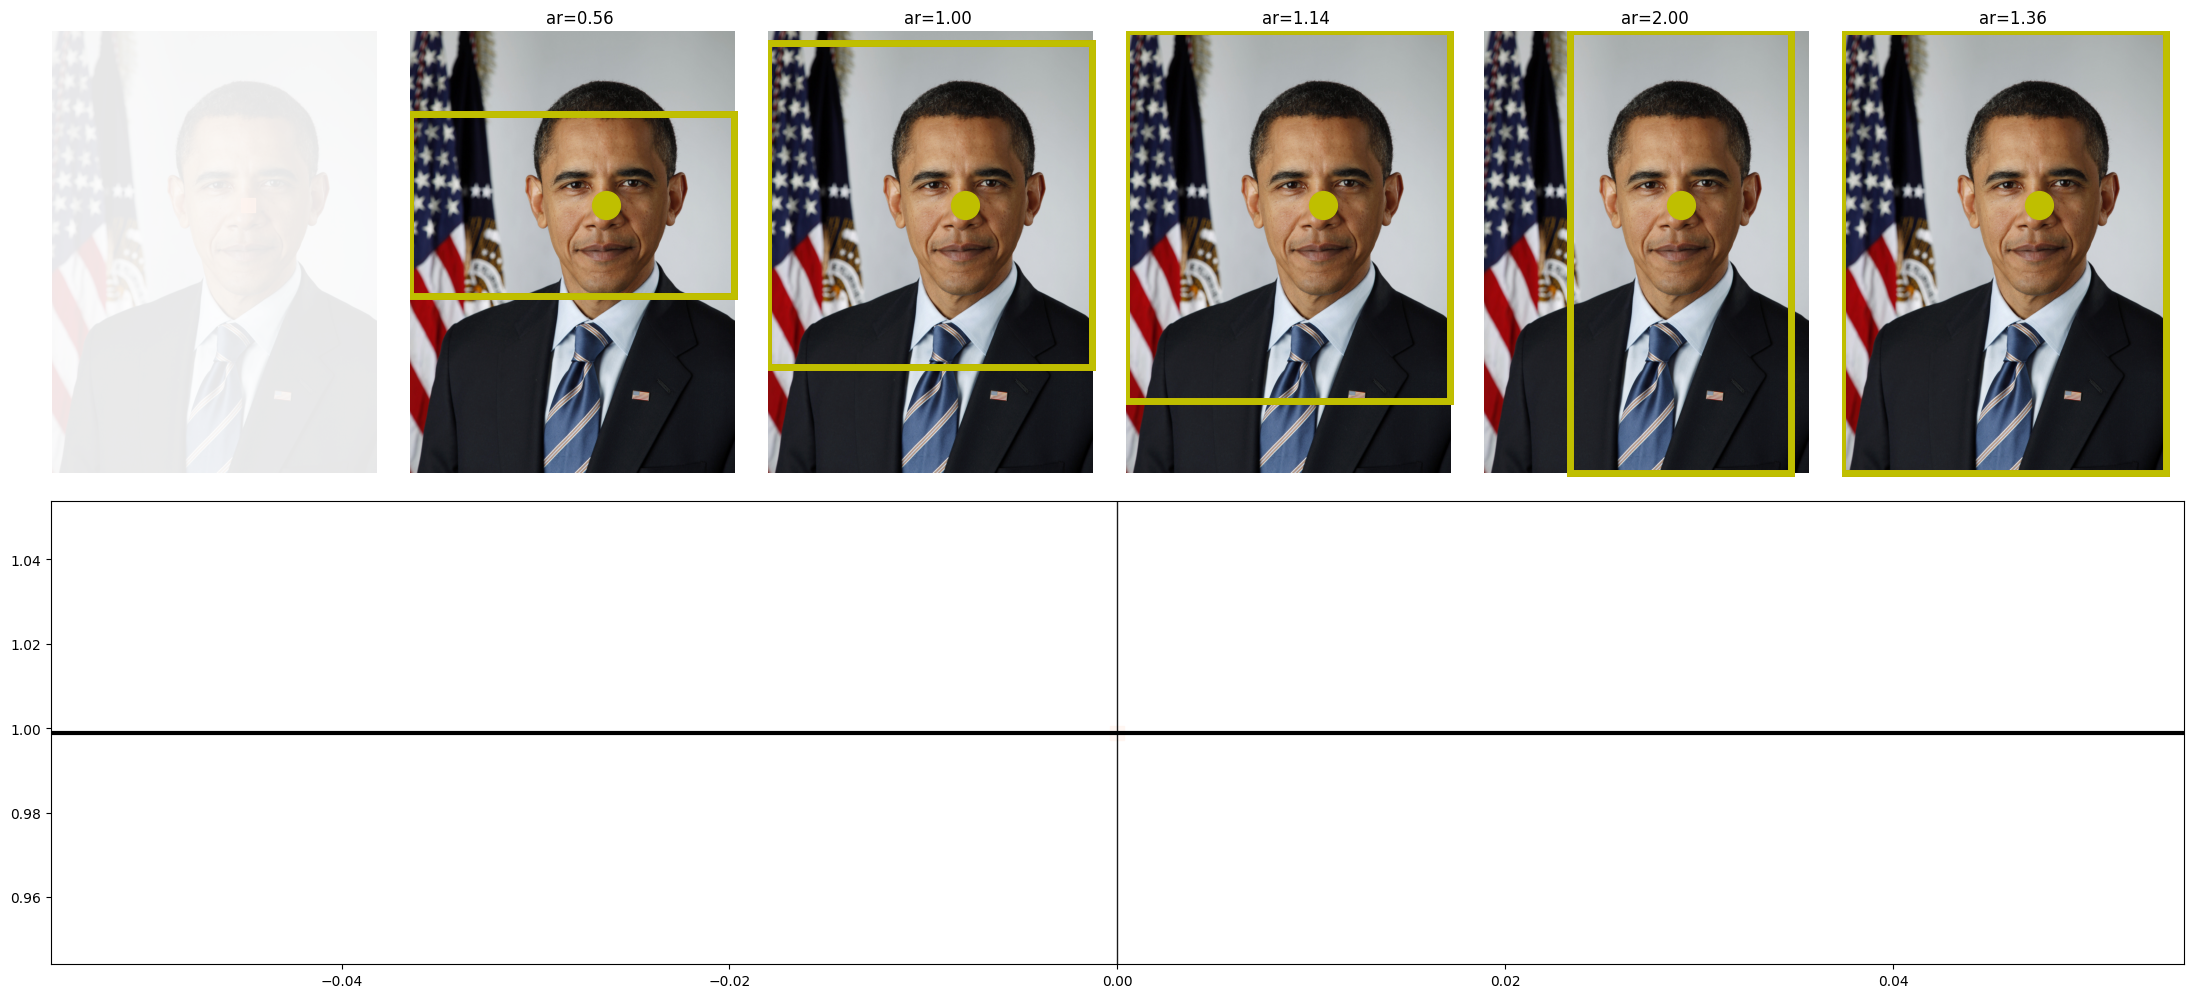

In [17]:
from crop_api import reservoir_sampling

for img_path in reservoir_sampling(data_dir.glob("./*.jpeg"), K=5):
    model.plot_img_crops(img_path)

None 1916 2608


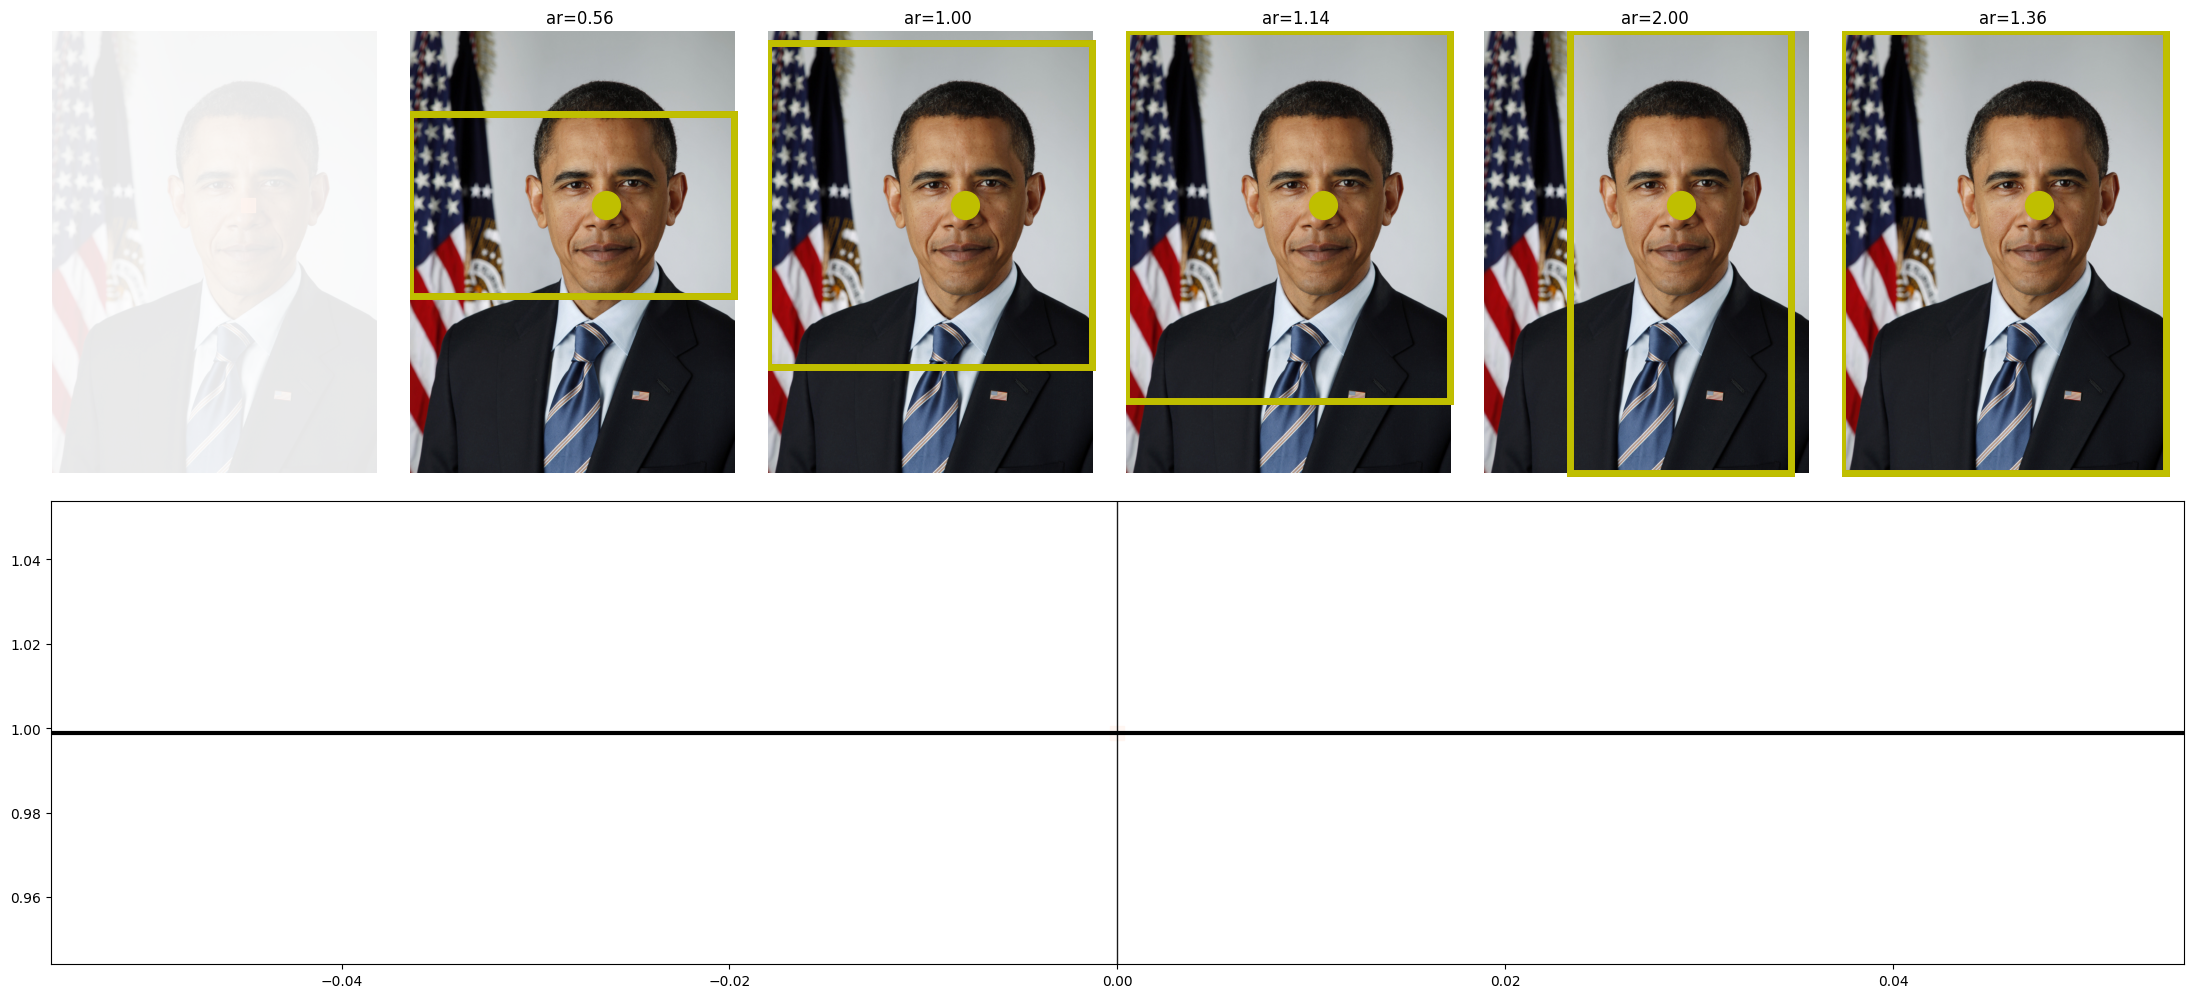

In [18]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=2)
plt.savefig("dummy.jpg", bbox_inches="tight")

## Sample crops based on saliency scores


* First, we show the top 3 crops based sorted saliency scores (highest first)
* Next, we show the top 3 crops sampled based on saliency scores converted into probs using the following formula:

$$
\begin{equation}
p_i = \frac{exp(s_i)}{Z}\\
Z = \sum_{j=0}^{j=N} exp(s_j)
\end{equation}
$$

None 1916 2608


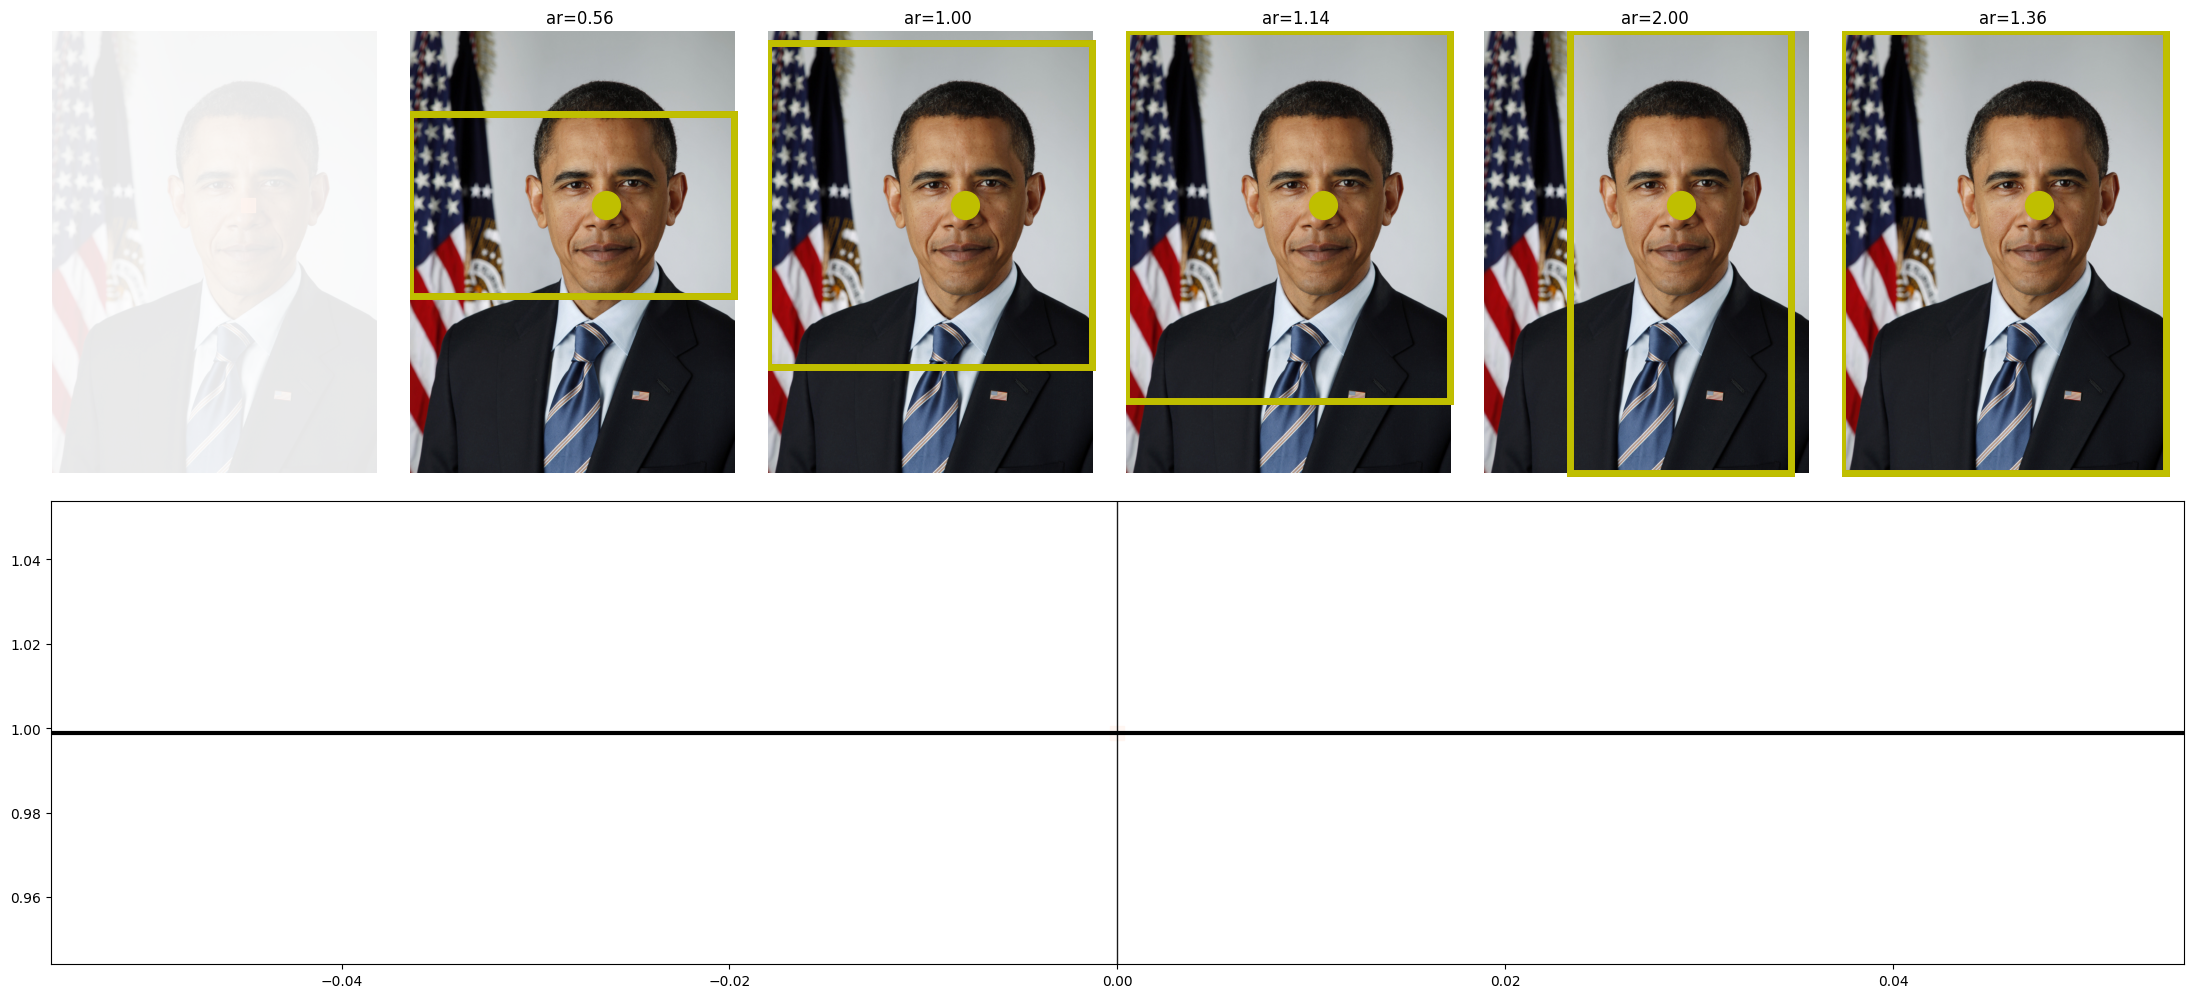

In [19]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=3)
plt.savefig("dummy_top3.jpeg", bbox_inches="tight")

None 1916 2608


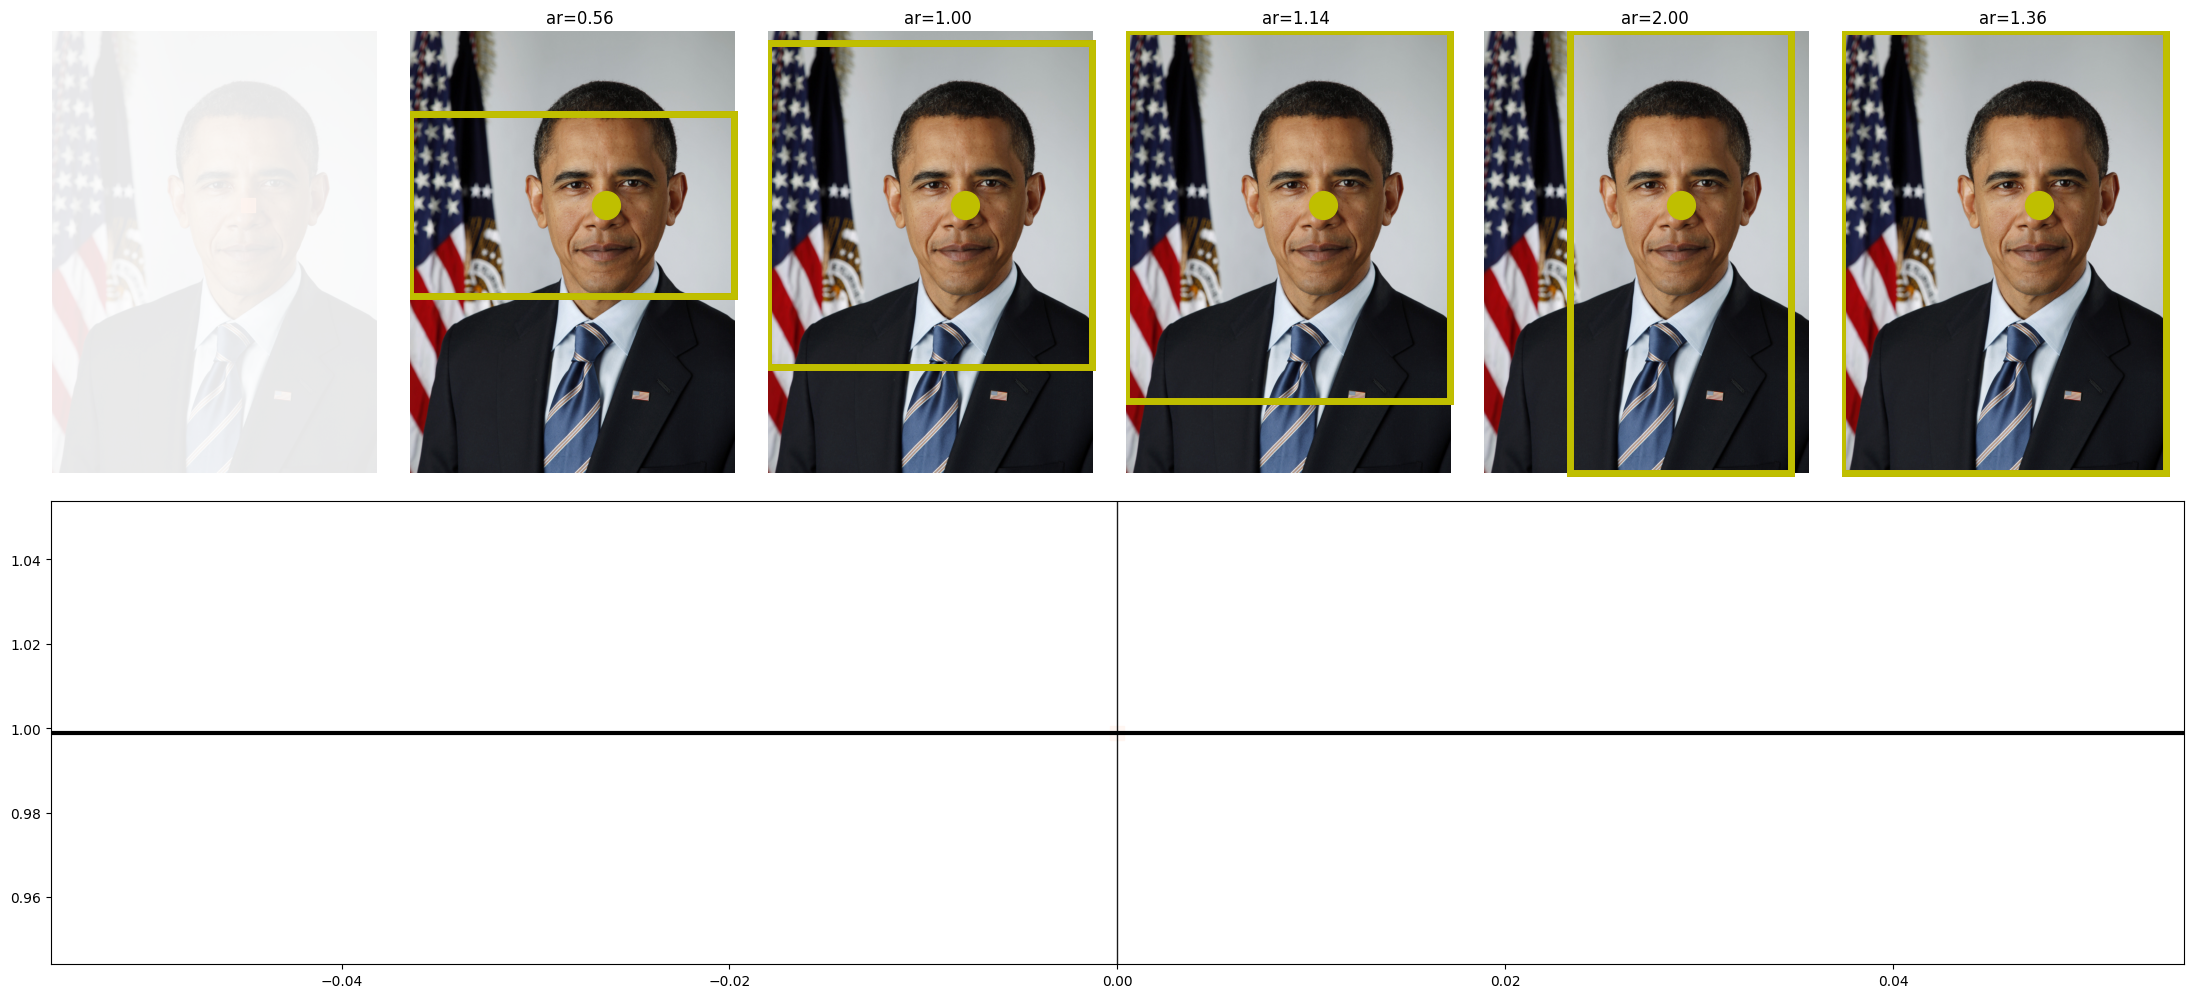

In [20]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=3, sample=True)

## Crop an image generated using combination of images

In [21]:
from PIL import Image

from image_manipulation import join_images

In [22]:
images = [Image.open(x) for x in data_dir.glob("./*.jpeg")]
img = join_images(images, col_wrap=2, img_size=(128, -1))

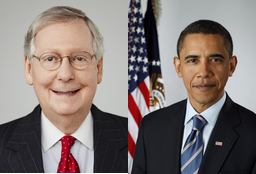

In [23]:
img

/var/folders/1y/_th8l6b11bscfw01pjl35xnh0000gn/T/tmp_h3dh5li
None 189 128


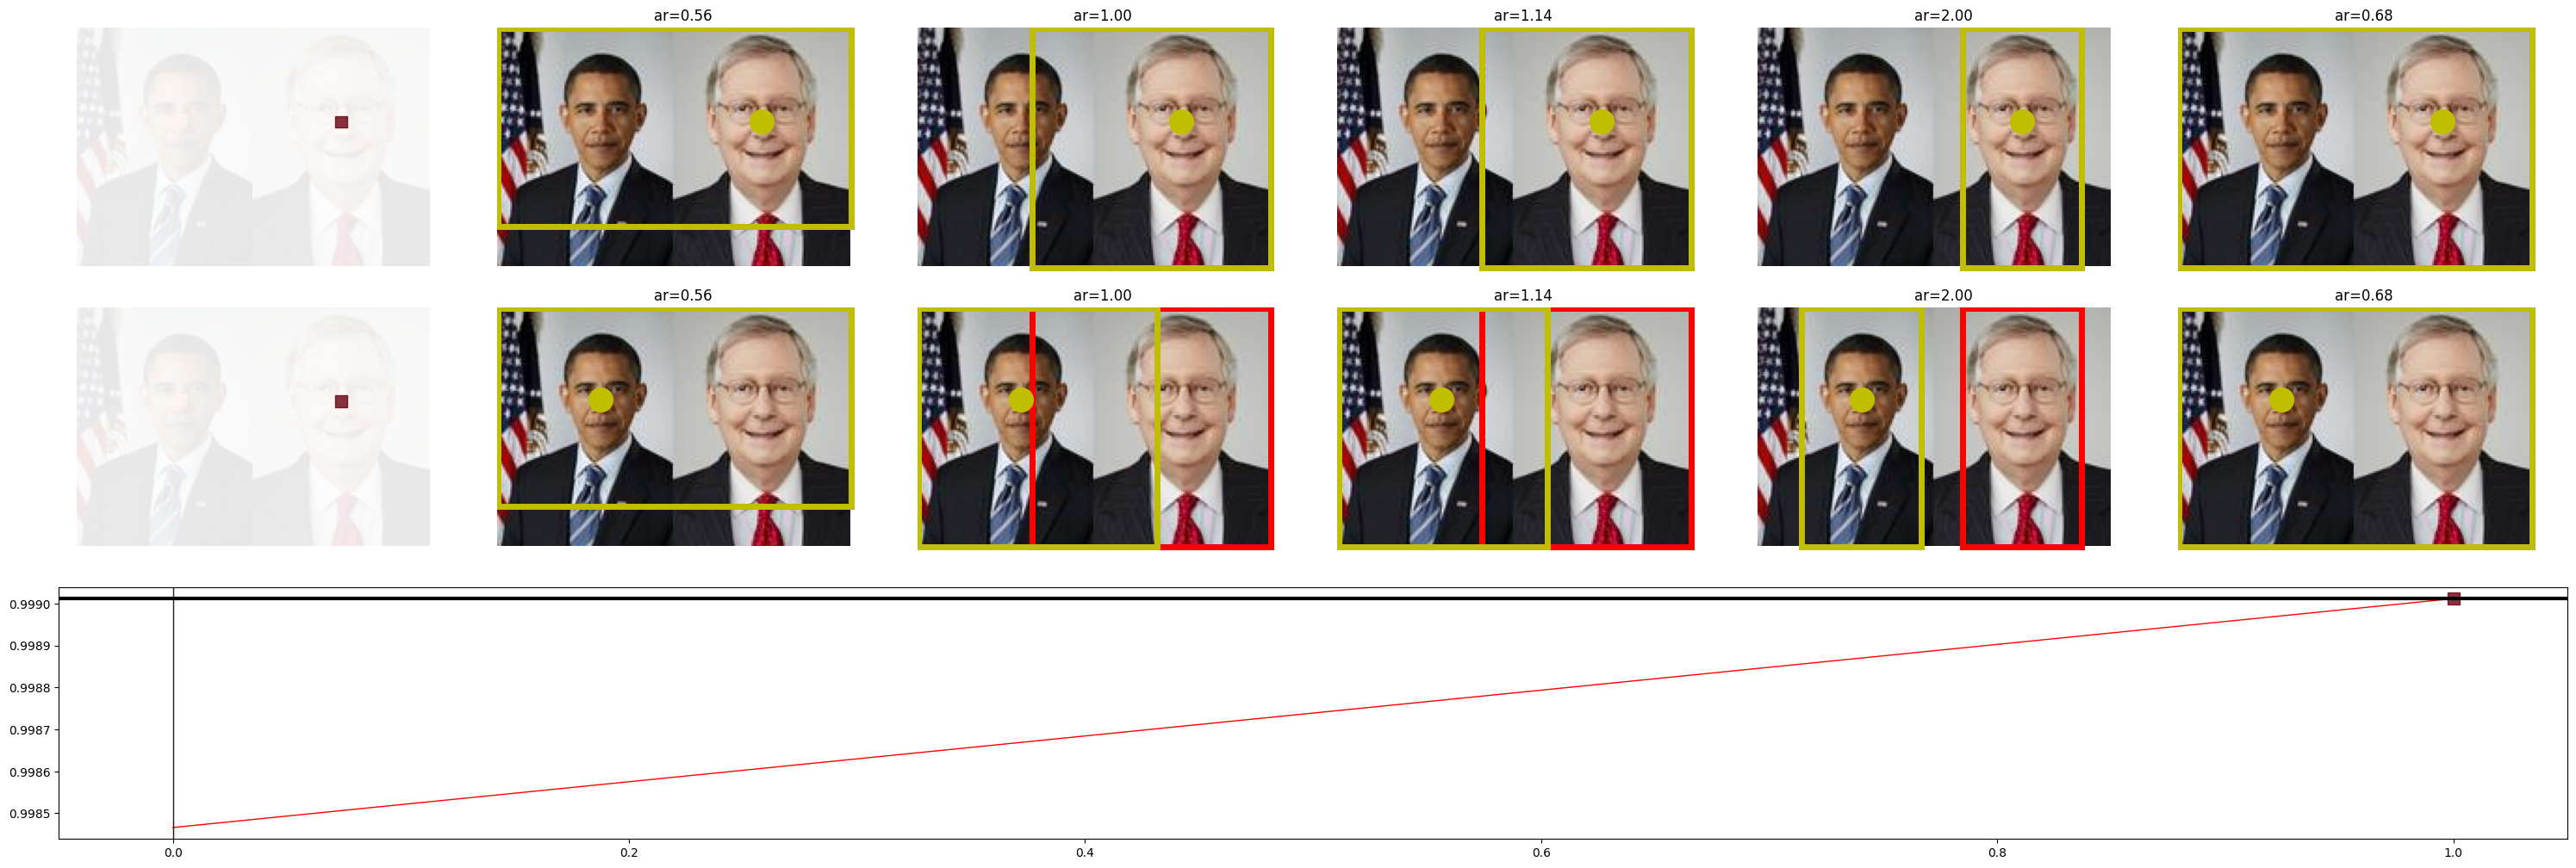

In [24]:
images = [
    Image.open(data_dir / Path("./dummy.jpeg")),
    Image.open(data_dir / Path("./dummy2.jpeg")),
]
img = join_images(images, col_wrap=2, img_size=(128, 128), padding=0)
model.plot_img_crops_using_img(img, topK=5)
plt.savefig("dummy_dummy.jpeg", bbox_inches="tight")

/var/folders/1y/_th8l6b11bscfw01pjl35xnh0000gn/T/tmp4duku5rs
None 95 356


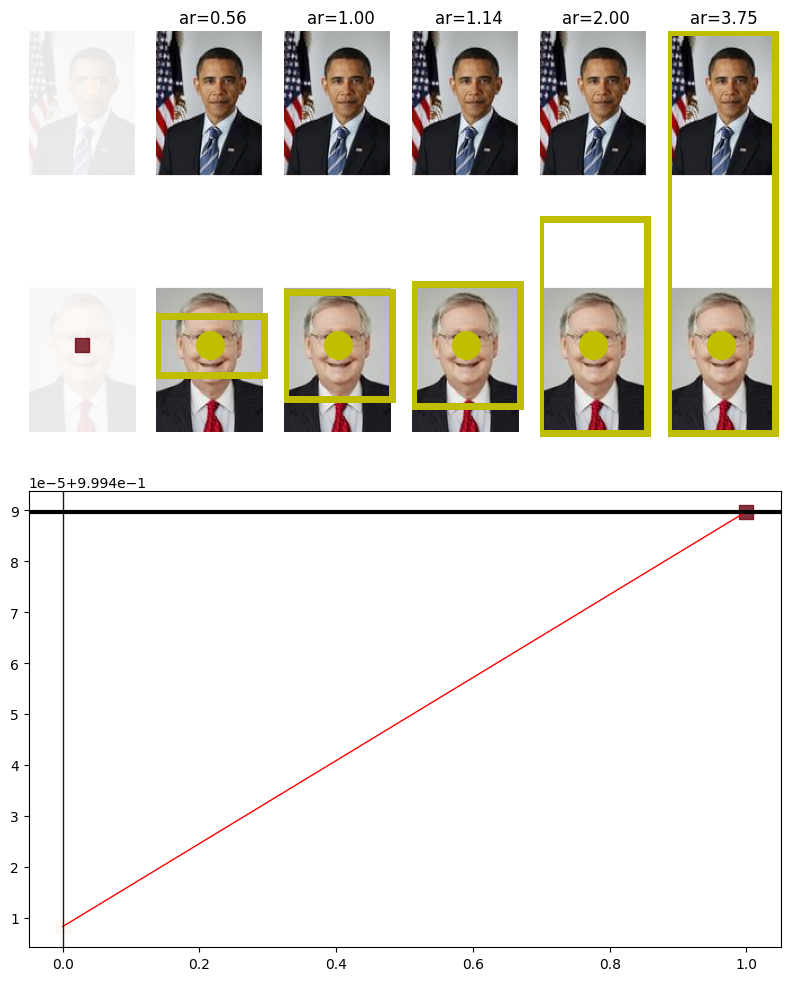

In [25]:
images = [
    Image.open(data_dir / Path("./dummy.jpeg")),
    Image.open(data_dir / Path("./dummy2.jpeg")),
]
img = join_images(images, col_wrap=1, img_size=(128, 128), padding=100)
model.plot_img_crops_using_img(img, topK=1)

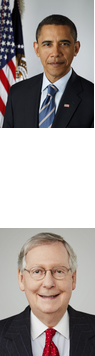

In [26]:
img

In [27]:
img.save("dummy_dummy_stiched.jpeg", "JPEG")

None 95 356


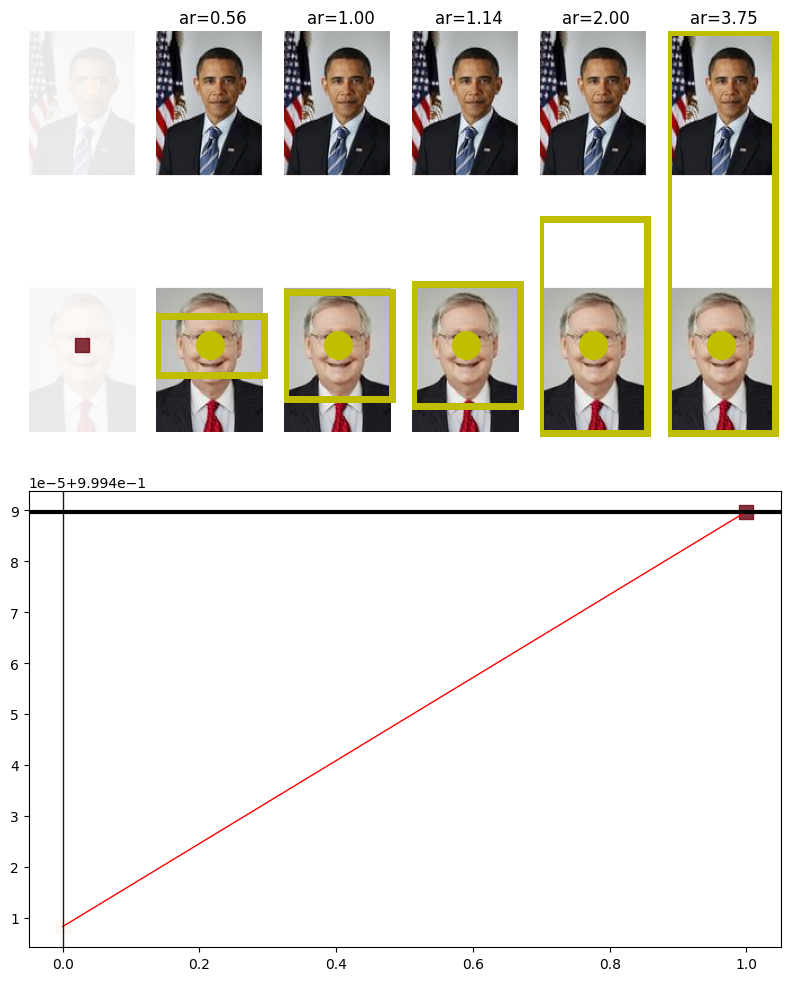

In [28]:
img_path = Path("dummy_dummy_stiched.jpeg")
model.plot_img_crops(img_path, topK=1)
plt.savefig("dummy_dummy.jpeg", bbox_inches="tight")

[0.56] 1916 2608


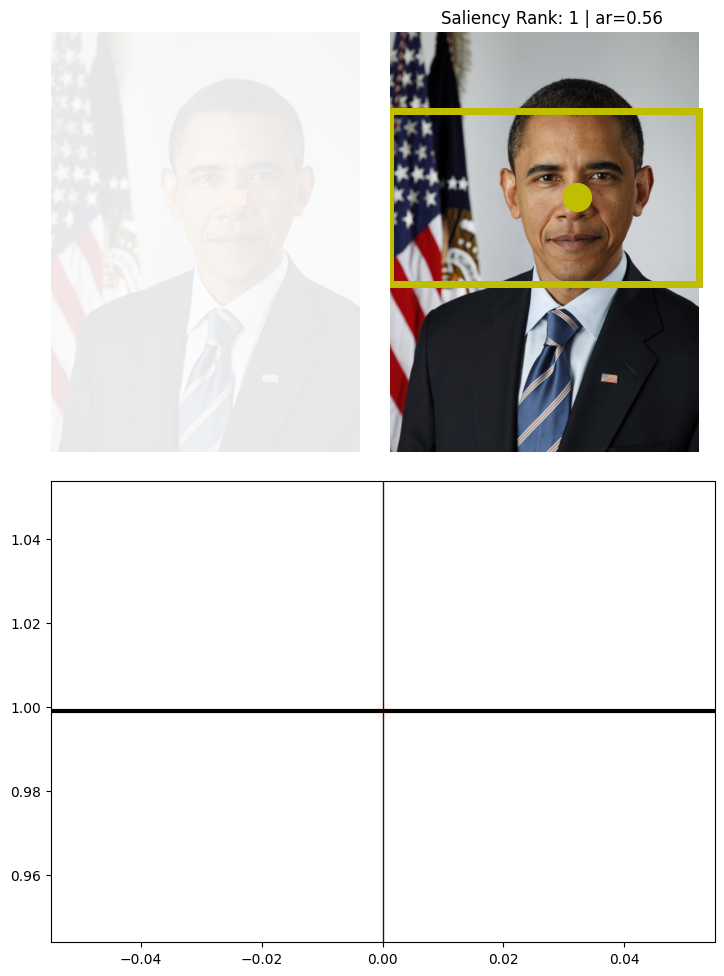

In [29]:
model.plot_img_crops(data_dir / Path("./dummy.jpeg"), topK=2, aspectRatios=[0.56])
plt.savefig("dummy.jpeg", bbox_inches="tight")

None 95 356


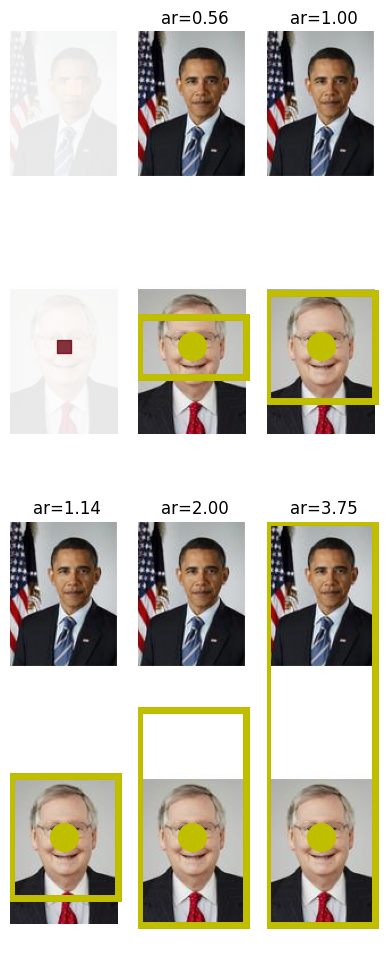

In [30]:
img_path = Path("dummy_dummy_stiched.jpeg")
model.plot_img_crops(img_path, topK=1, add_saliency_line=False, col_wrap=3)
plt.savefig("dummy_dummy.jpeg", bbox_inches="tight")